## Observations and Insights 

In [1]:
#1. From the boxplot we constructed, we can see that Infubinol and Ceftamin seem to be less effective at reducing tumor size in mice than Capomulin and Ramicane. 
#2. Additionally, from the scatterplot we constructed we can see that Tumor volume and mouse weight are positively correlated with each other and it seems that as mouse weight increases, Tumor volume increases with it.
3#. Lastly, we can see that at least for one mouse on Capomulin, tumor size shrank as treatment time increased showing that Capomulin is demonstrating effectiveness at reducing tumor size. This fits along with what our boxplot shows

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "Mouse.csv"
study_results_path = "results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df = pd.DataFrame(mouse_metadata, columns= ["Mouse ID","Drug Regimen","Sex","Age_months","Weight (g)"])
mouse_df.head()
results_df = pd.DataFrame(study_results, columns= ["Mouse ID","Timepoint","Tumor Volume (mm3)","Metastatic Sites"])
results_df.head()
merge_df = pd.merge(mouse_df, results_df, on="Mouse ID")
# Display the data table for preview
merge_df.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice.
merge_df["Mouse ID"].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_Rows = merge_df[merge_df.duplicated(["Mouse ID", "Timepoint"])]
print(duplicate_Rows)


    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merge_df.drop(merge_df.loc[merge_df["Mouse ID"]=='g989'].index, inplace=True)

In [5]:
# Checking the number of mice in the clean DataFrame.
merge_df["Mouse ID"].nunique()

248

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_df = merge_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
print(summary_df)


             Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398


## Bar and Pie Charts

Text(0.5, 1.0, 'Measuremnt Counts for Each Drug regimen')

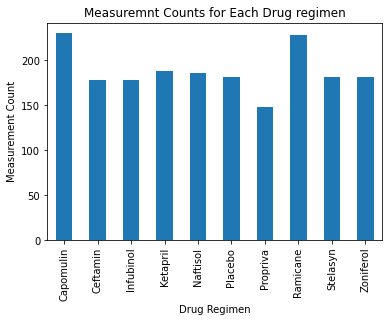

In [7]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_group = merge_df.groupby("Drug Regimen")
measurements = drug_group ["Timepoint"].count()
bar1 = measurements.plot(kind = 'bar')
bar1.set_xlabel("Drug Regimen")
bar1.set_ylabel("Measurement Count")
bar1.set_title("Measuremnt Counts for Each Drug regimen")

Text(0.5, 1.0, 'Measuremnt Counts for Each Drug regimen')

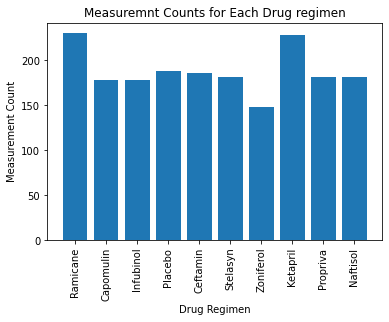

In [8]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = merge_df["Drug Regimen"].unique()
y_axis = measurements
plt.bar(x_axis, y_axis)
plt.xticks(rotation = 90)
plt.xlabel("Drug Regimen")
plt.ylabel("Measurement Count")
plt.title("Measuremnt Counts for Each Drug regimen")

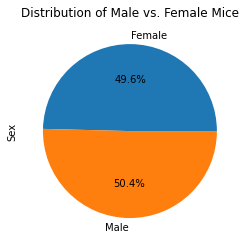

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_df.drop(mouse_df.loc[mouse_df["Mouse ID"]=='g989'].index, inplace=True)
gender_group = mouse_df.groupby("Sex")
gender_count = gender_group["Sex"].count()
pie_chart = gender_count.plot(kind = 'pie', autopct='%1.1f%%', title = "Distribution of Male vs. Female Mice", )

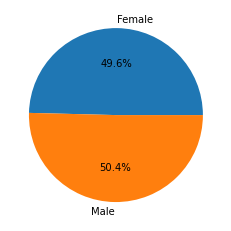

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', "Male"]
plt.pie(gender_count, labels = labels, autopct='%1.1f%%')
plt.show()

## Quartiles, Outliers and Boxplots

In [11]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_tumor_volume = merge_df.drop_duplicates(subset = "Mouse ID", keep = "last")
final_tumor_volume.head()
# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1


In [12]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
cap_final_volume = final_tumor_volume.loc[final_tumor_volume["Drug Regimen"] == "Capomulin", :]
ram_final_volume = final_tumor_volume.loc[final_tumor_volume["Drug Regimen"] == "Ramicane", :]
inf_final_volume = final_tumor_volume.loc[final_tumor_volume["Drug Regimen"] == "Infubinol", :]
cef_final_volume = final_tumor_volume.loc[final_tumor_volume["Drug Regimen"] == "Ceftamin", :]
 
cap_q1 = cap_final_volume["Tumor Volume (mm3)"].quantile(.25)
ram_q1 = ram_final_volume["Tumor Volume (mm3)"].quantile(.25)
inf_q1 = inf_final_volume["Tumor Volume (mm3)"].quantile(.25)
cef_q1 = cef_final_volume["Tumor Volume (mm3)"].quantile(.25)

cap_mean = cap_final_volume["Tumor Volume (mm3)"].quantile(.5)
ram_mean = ram_final_volume["Tumor Volume (mm3)"].quantile(.5)
inf_mean = inf_final_volume["Tumor Volume (mm3)"].quantile(.5)
cef_mean = cef_final_volume["Tumor Volume (mm3)"].quantile(.5)

cap_q3 = cap_final_volume["Tumor Volume (mm3)"].quantile(.75)
ram_q3 = ram_final_volume["Tumor Volume (mm3)"].quantile(.75)
inf_q3 = inf_final_volume["Tumor Volume (mm3)"].quantile(.75)
cef_q3 = cef_final_volume["Tumor Volume (mm3)"].quantile(.75)

cap_iqr = cap_q3 - cap_q1
ram_iqr = ram_q3 - ram_q1
inf_iqr = inf_q3 - inf_q1
cef_iqr = cef_q3 - cef_q1


cap_outliers =  []
ram_outliers = []
inf_outliers = []
cef_outliers = []

for column,row in cap_final_volume.iterrows():
    if (row["Tumor Volume (mm3)"] < (cap_mean - (1.5 * cap_iqr))) | (row["Tumor Volume (mm3)"] > (cap_mean + (1.5 * cap_iqr))):
        cap_outliers.append(row)
    if (row["Tumor Volume (mm3)"] < (ram_mean - (1.5 * ram_iqr))) | (row["Tumor Volume (mm3)"] > (ram_mean + (1.5 * ram_iqr))):
        ram_outliers.append(row)
    if (row["Tumor Volume (mm3)"] < (inf_mean - (1.5 * inf_iqr))) | (row["Tumor Volume (mm3)"] > (inf_mean + (1.5 * inf_iqr))):
        inf_outliers.append(row)
    if (row["Tumor Volume (mm3)"] < (cef_mean - (1.5 * cef_iqr))) | (row["Tumor Volume (mm3)"] > (cef_mean + (1.5 * cef_iqr))):
        cef_outliers.append(row)

print(cap_outliers)
print(ram_outliers)
print(inf_outliers)
print(cef_outliers)
    
    

[Mouse ID                   s185
Drug Regimen          Capomulin
Sex                      Female
Age_months                    3
Weight (g)                   17
Timepoint                    45
Tumor Volume (mm3)      23.3436
Metastatic Sites              1
Name: 19, dtype: object]
[]
[Mouse ID                   s185
Drug Regimen          Capomulin
Sex                      Female
Age_months                    3
Weight (g)                   17
Timepoint                    45
Tumor Volume (mm3)      23.3436
Metastatic Sites              1
Name: 19, dtype: object, Mouse ID                   x401
Drug Regimen          Capomulin
Sex                      Female
Age_months                   16
Weight (g)                   15
Timepoint                    45
Tumor Volume (mm3)       28.484
Metastatic Sites              0
Name: 29, dtype: object, Mouse ID                   m601
Drug Regimen          Capomulin
Sex                        Male
Age_months                   22
Weight (g)              

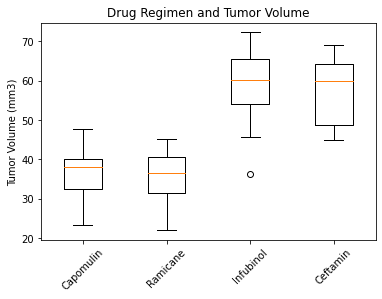

In [13]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
box_data = [cap_final_volume["Tumor Volume (mm3)"], ram_final_volume["Tumor Volume (mm3)"],inf_final_volume["Tumor Volume (mm3)"],cef_final_volume["Tumor Volume (mm3)"]]

fig1, ax1 = plt.subplots()
ax1.set_title("Drug Regimen and Tumor Volume")
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(box_data)
ax1.set_xticklabels(treatments, rotation = 45)
plt.show()

## Line and Scatter Plots

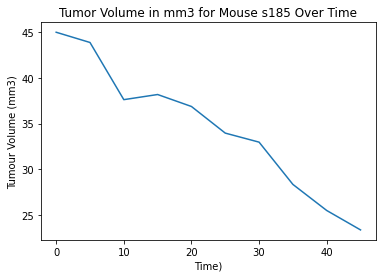

In [14]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
s185 = merge_df.loc[merge_df["Mouse ID"] == "s185", :]
plt.plot(s185["Timepoint"], s185["Tumor Volume (mm3)"])
plt.title("Tumor Volume in mm3 for Mouse s185 Over Time")
plt.xlabel("Time)")
plt.ylabel("Tumour Volume (mm3)")
plt.show()

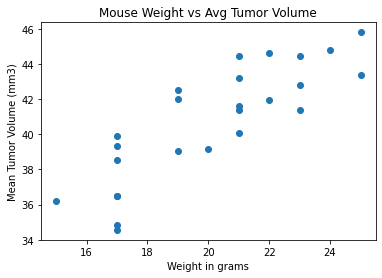

In [15]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_tumor = merge_df.loc[merge_df["Drug Regimen"] == "Capomulin", :]
cap_final_volume_group = cap_tumor.groupby("Mouse ID")
cap_mean = cap_final_volume_group.mean()

plt.scatter(cap_mean["Weight (g)"], cap_mean["Tumor Volume (mm3)"])
plt.xlabel("Weight in grams")
plt.ylabel("Mean Tumor Volume (mm3)")
plt.title ("Mouse Weight vs Avg Tumor Volume")
plt.show()

## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr = round(st.pearsonr(cap_mean["Weight (g)"], cap_mean['Tumor Volume (mm3)'])[0], 2)
print(f' The correlation coefficient between mean tumor volume and mouse weight is: {corr}')

(slope, intercept, rvalue, pvalue, stderr) = linregress(cap_mean["Weight (g)"], cap_mean["Tumor Volume (mm3)"])
regression = cap_mean["Weight (g)"] * slope + intercept
reg_eq = " y = " + str(round(slope,2)) + "x " + str(round(intercept, 2))
print(f' The linear regression model is {reg_eq}')

 The correlation coefficient between mean tumor volume and mouse weight is: 0.84
 The linear regression model is  y = 0.95x 21.55
